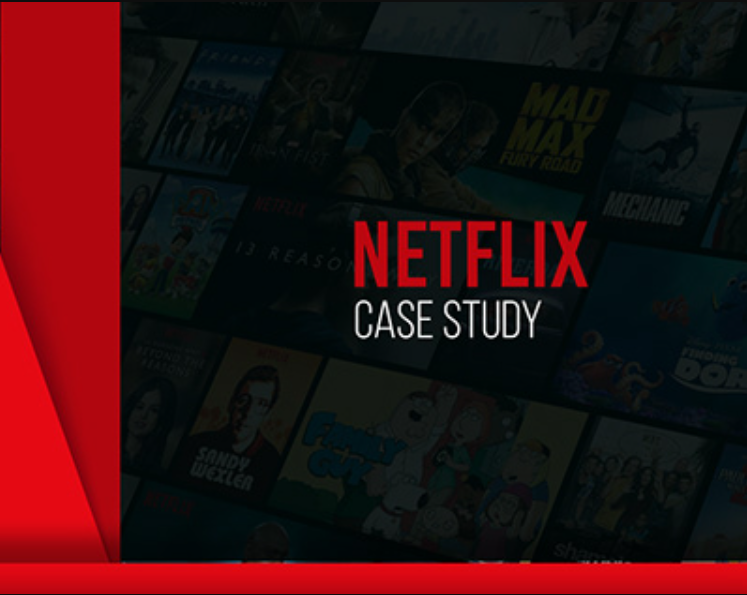


# 1. Defining Problem Statement and Analysing Basic Metrics

## Problem Statement
Netflix is one of the leading media and video streaming platforms with over 222M subscribers globally.  
The business challenge is to **analyze Netflix's catalog of TV Shows and Movies** in order to generate insights that help answer two key questions:
1. What type of content should Netflix focus on producing?  
2. How can Netflix grow its business in different countries?  

By exploring the dataset, we aim to uncover content patterns (movies vs. TV shows, genres, countries, directors, release trends, etc.) and recommend **data-driven strategies**.

---

## Basic Metrics to Analyze
Before diving into deeper analysis, we’ll start with some **basic metrics**:
- **Dataset Size** → How many total entries are in the dataset?  
- **Content Mix** → How many Movies vs. TV Shows?  
- **Time Coverage** → Range of Release Years represented.  
- **Subscribers (Business Context)** → While subscriber count (222M+) isn’t in the dataset, it provides business scale context.

These basic checks give us a **high-level overview** of Netflix’s catalog and help set the stage for deeper analysis.


# Exploratory Data Analysis (EDA) Setup
**Importing required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*   Load the dataset
*   Make sure the dataset file is uploaded in Colab before running this


In [ ]:
df = pd.read_csv('/content/netflix.csv')

In [ ]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...



Before diving into insights, we need to **understand the structure and quality of our dataset**.  
This involves some basic but crucial checks:

### a. Observations on the Shape of Data
We check the **number of rows and columns** in the dataset.  
- Rows = total entries (each representing a Movie or TV Show).  
- Columns = number of attributes (like title, director, release year, etc.).

In [ ]:
# a. Shape of the data
print("Dataset Shape (rows, columns):", df.shape)

Dataset Shape (rows, columns): (8807, 12)


### b. Data Types of All Attributes
We examine whether attributes are **strings, integers, floats, or categorical variables**.  
This helps us decide if transformations are required.

In [ ]:
# b. Data types of all attributes
print("\nData Types of Attributes:")
print(df.dtypes)



Data Types of Attributes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


•	Data types:
1. Most columns are categorical (e.g. Type, Rating, Country)
2. one numeric (Release Year)
3. Date Added is a date.


In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


•	Content mix:6,131 Movies,2,676 TV Shows

In [ ]:
df['type'].value_counts(normalize=True)*100

,proportion
type,
Movie,69.615079
TV Show,30.384921


### c. Conversion of Categorical Attributes
Some columns like **`type` (Movie/TV Show), `rating`, `director`** can be converted to the `'category'` datatype.  
- This reduces memory usage.  
- Makes operations like grouping and visualization faster.


This helps us understand how the data is distributed across different types.

movies  ~70%
TV show ~30%


In [ ]:
# c. Conversion of categorical attributes
categorical_cols = ['type', 'rating', 'director','duration']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("\nUpdated Data Types after conversion:")
print(df.dtypes)


Updated Data Types after conversion:
show_id           object
type            category
title             object
director        category
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration        category
listed_in         object
description       object
dtype: object


You can rename a column in pandas using .rename()

In [ ]:
df=df.rename(columns={'listed_in':'genre'})
df['genre']=df['genre'].astype(object)

### d. Missing Value Detection
We check for missing/null values in each column.  
- Important because missing data can distort analysis.  
- It also tells us where Netflix has incomplete catalog info.

Categorical columns (Type, Country,director) can be converted to “category” types for efficiency.

In [ ]:
print("missing value in each column:")
print(df.isnull().sum())

missing value in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64


In [ ]:
print(df.isnull().mean()*100)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


Missing values: Significant gaps in some fields: ~30% of Director entries missing, ~9% of Cast, ~9% of Country

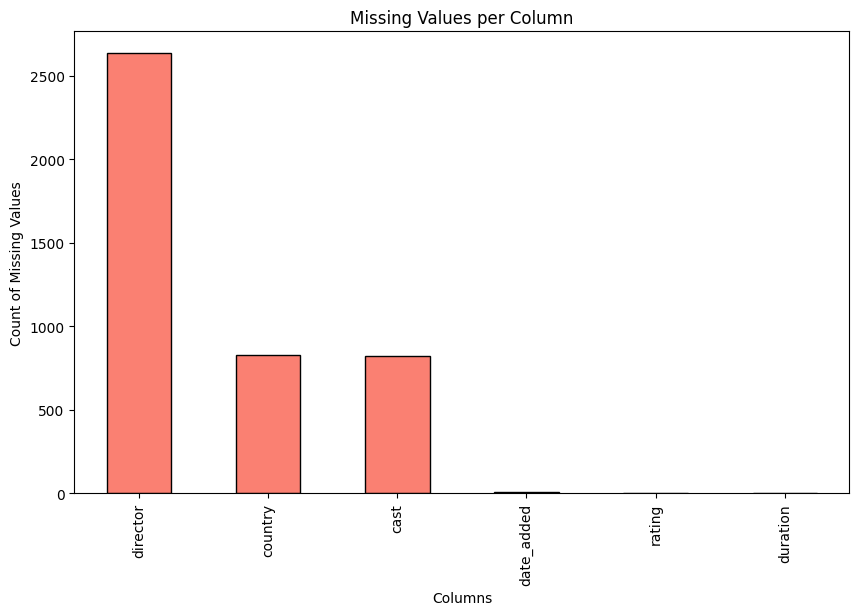

In [ ]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10,6))
missing_counts.sort_values(ascending=False).plot.bar(color="salmon", edgecolor="black")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()


### e. Statistical Summary
We generate a quick **summary of numerical columns** (like `release_year`).  
- This shows count, mean, min, max, quartiles, etc.  
- It helps detect unusual values or data entry errors.

In [ ]:
print("\nStatistical summary of numeric columns:")
print(df.describe(include=np.number))


Statistical summary of numeric columns:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print(df.describe(include=['category']))

         type       director rating  duration
count    8807           6173   8803      8804
unique      2           4528     17       220
top     Movie  Rajiv Chilaka  TV-MA  1 Season
freq     6131             19   3207      1793


In [ ]:
df_genre = df['genre'].dropna().str.split(',').explode().str.strip()
print(df_genre.describe())

count                    19323
unique                      42
top       International Movies
freq                      2752
Name: genre, dtype: object


  Statistical summary:
•	Year ranges 1925–2021 (mostly modern content; see below).

•	Rating: 17 distinct categories with most titles rated TV-MA

•	Genre (“Listed_in”): 42 unique genres after splitting comma-separated lists with top genre International Movies.


#Non-Graphical Analysis: Value Counts and Unique Attributes

To understand Netflix’s catalog, we explore **categorical columns** like `type`, `rating`, `country`, and `director`.  


In [ ]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


insight:Netflix mostly concentrates on movies rather than TV Shows.

In [ ]:
# b. Value counts for 'rating'
print("\nRating Distribution:")
print(df['rating'].value_counts())


Rating Distribution:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
66 min         1
84 min         1
74 min         1
Name: count, dtype: int64


Ratings: 17 unique rating labels with most frequent being TV-MA (adults) and TV-14 (teens)

insight: consistent with Netflix’s adult-leaning catalog and Children’s ratings (TV-G/Y) appearing much less.

In [ ]:
#Unique counts for selected categorical attributes
print("\nNumber of Unique Values:")
print("Unique Directors:", df['director'].nunique())
print("Unique Countries:", df['country'].nunique())
print("Unique Ratings:", df['rating'].nunique())
print("Unique Listed_in Categories (Genres):", df['genre'].nunique())


Number of Unique Values:
Unique Directors: 4528
Unique Countries: 748
Unique Ratings: 17
Unique Listed_in Categories (Genres): 514


we get wrong unique values without data cleaning.so we clean data which contains rows multiple entries just by seperated commas.

In [ ]:
def nunique_after_split(df, category_cols):
    result = {}
    for col in category_cols:
        unique_count = (
            df[col]
            .dropna()
            .str.split(', ')
            .explode()
            .str.strip()
            .nunique()
        )
        result[col] = unique_count
    return pd.Series(result, name="Unique_Counts")


In [ ]:
# Example: for your categorical columns
cat_cols = ['director', 'genre','country','rating']   # add more categorical cols here
print(nunique_after_split(df, cat_cols))


director    4993
genre         42
country      127
rating        17
Name: Unique_Counts, dtype: int64


In [ ]:

# 1. Split multiple countries and flatten into rows
all_countries = df['country'].dropna().str.split(',').explode().str.strip()

# 2. Count number of unique countries
unique_countries = all_countries.nunique()
print(f"Number of unique countries: {unique_countries}")

# 3. Get top contributing countries
top_countries = all_countries.value_counts()
print("\nTop Countries:\n", top_countries.head(10))  # top 10 countries



Number of unique countries: 123

Top Countries:
 country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


In [ ]:
# Split directors by comma, explode into new rows, strip spaces
df_directors = df['director'].dropna().str.split(',').explode().str.strip()

# Now get top 10 directors
top_directors = df_directors.value_counts().head(10)

print("\nTop 10 Directors by Number of Titles (after splitting):")
print(top_directors)



Top 10 Directors by Number of Titles (after splitting):
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: count, dtype: int64


In [ ]:
df_genre=df['genre'].dropna().str.split(',').explode().str.strip()
top_genres=df_genre.value_counts().head(3)
top_genres

,count
genre,
International Movies,2752
Dramas,2427
Comedies,1674


In [ ]:
import pandas as pd

# 1. Split genres into rows
all_genres = df['genre'].dropna().str.split(',').explode().str.strip()

# 2. Count unique genres
unique_genres = all_genres.nunique()
print(f"Number of unique genres: {unique_genres}")   # ~42

# 3. Count how many genres each title has (genre overlaps)
df['genre_count'] = df['genre'].dropna().apply(lambda x: len(x.split(',')))
print("\nAverage number of genres per title:", df['genre_count'].mean())
print("Titles with multiple genres:", (df['genre_count'] > 1).sum())

# 4. Example: show first few titles with multiple genres
print("\nExamples of multi-genre titles:")
print(df[df['genre_count'] > 1][['title','genre']].head())


Number of unique genres: 42

Average number of genres per title: 2.194050187350971
Titles with multiple genres: 6787

Examples of multi-genre titles:
                   title                                              genre
1          Blood & Water    International TV Shows, TV Dramas, TV Mysteries
2              Ganglands  Crime TV Shows, International TV Shows, TV Act...
3  Jailbirds New Orleans                             Docuseries, Reality TV
4           Kota Factory  International TV Shows, Romantic TV Shows, TV ...
5          Midnight Mass                 TV Dramas, TV Horror, TV Mysteries


In [ ]:
# d. Display most frequent values (mode)
print("\nMost Frequent Values are")
print("Most Common Director:", df['director'].mode()[0] if not df['director'].mode().empty else "N/A")
print("Most Common Country:", df['country'].mode()[0] if not df['country'].mode().empty else "N/A")
print("Most Common Rating:", df['rating'].mode()[0] if not df['rating'].mode().empty else "N/A")



Most Frequent Values are
Most Common Director: Rajiv Chilaka
Most Common Country: United States
Most Common Rating: TV-MA


# 4. Visual Analysis - Univariate and Bivariate

Visual analysis helps reveal hidden insights that numbers alone can’t show.  
We will analyze Netflix’s data with **univariate plots** (looking at one variable at a time) and **bivariate plots** (relationships between two variables).  

### Pre-processing
Some columns like `cast`, `director`, and `country` contain multiple values separated by commas.  
We will "unnest" them into individual entries for cleaner analysis.

In [ ]:
# Pre-processing: unnest actors, directors, countries
# We will create helper functions to split multi-valued columns
def unnest_column(df, column_name):
    """Splits comma-separated values into individual rows"""
    s = df[column_name].dropna().str.split(', ')
    return s.explode().reset_index(drop=True)

# Example: Unique actors, directors, countries
actors = unnest_column(df, 'cast')
directors = unnest_column(df, 'director')
countries = unnest_column(df, 'country')
genre=unnest_column(df,'genre')

print("Unique Actors:", actors.nunique())
print("Unique Directors:", directors.nunique())
print("Unique Countries:", countries.nunique())
print("unique genre:",genre.nunique())


Unique Actors: 36439
Unique Directors: 4993
Unique Countries: 127
unique genre: 42


## Univariate Analysis for Continuous & Categorical Variables
- **Histograms / Distplots:** Show the frequency distribution of continuous variables (e.g., `release_year`).
- **Countplots:** Show the distribution of categorical variables (e.g., `type`, `rating`).

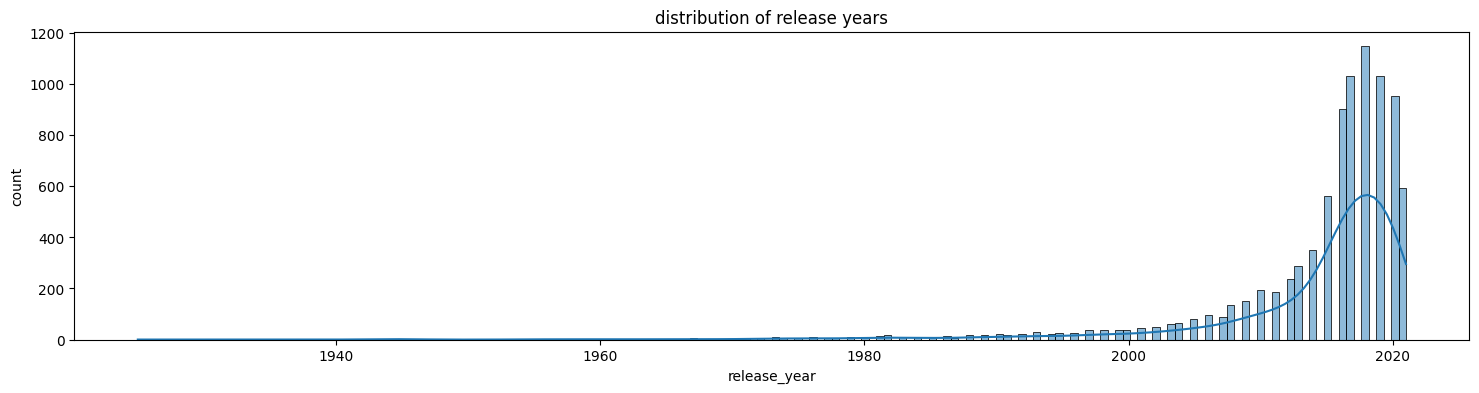

In [ ]:
#distribution of release years
plt.figure(figsize=(18,4))
sns.histplot(df['release_year'],bins=170,kde=True)
plt.title('distribution of release years')
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()

The distribution of Release Year is heavily skewed toward recent years. Very few titles pre-1950. By contrast, a large spike occurs in the 2010s, reflecting Netflix’s growth. Indeed, other analyses note Netflix’s content “growth started in 2014" and that content additions “exploded” after 2015.

/tmp/ipython-input-864824290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette="colorblind")


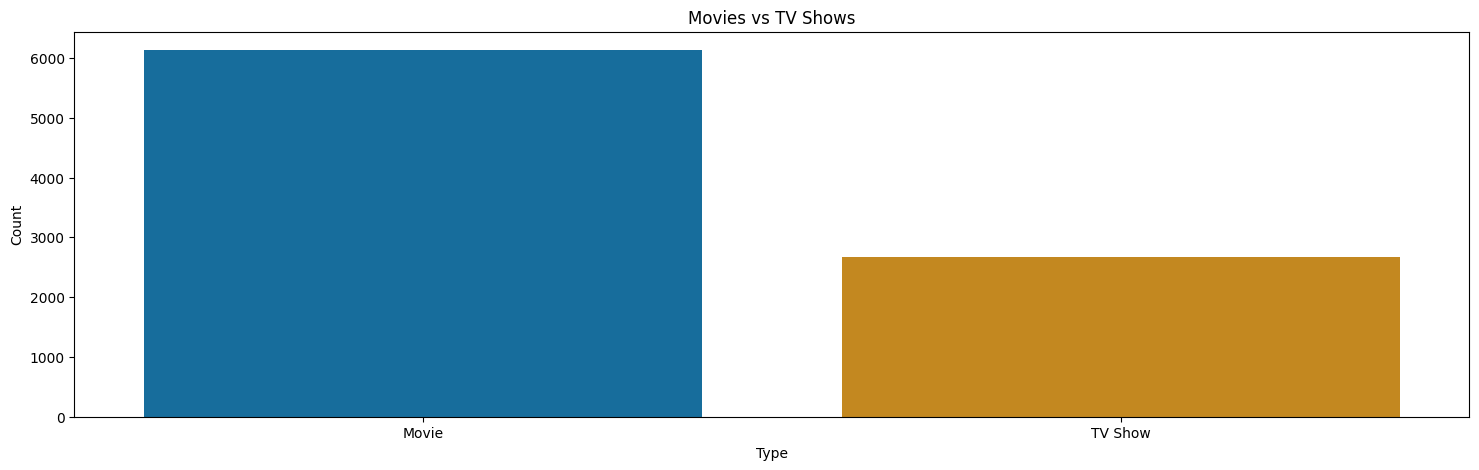

In [ ]:
# count plot of movies vs TV Shows
plt.figure(figsize=(18,5))
sns.countplot(data=df, x='type', palette="colorblind")
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

A simple count plot (bar chart) highlights that Netflix’s library has far more movies than series.

/tmp/ipython-input-3675513797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='type', palette="colorblind")


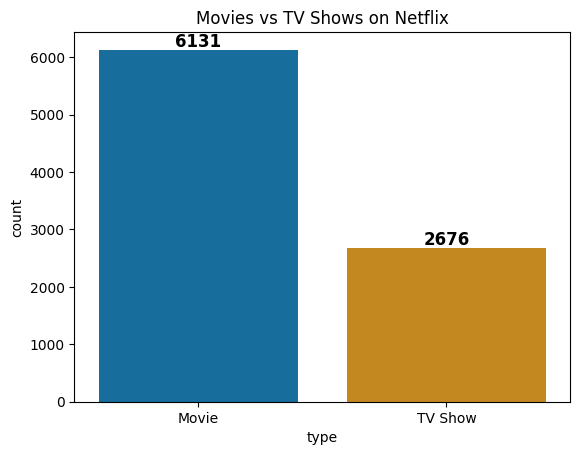

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='type', palette="colorblind")

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,  # adjust +50 for spacing
            int(height), ha="center", fontsize=12, fontweight="bold")

plt.title("Movies vs TV Shows on Netflix")
plt.show()


/tmp/ipython-input-1676356189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index,palette="Set3")


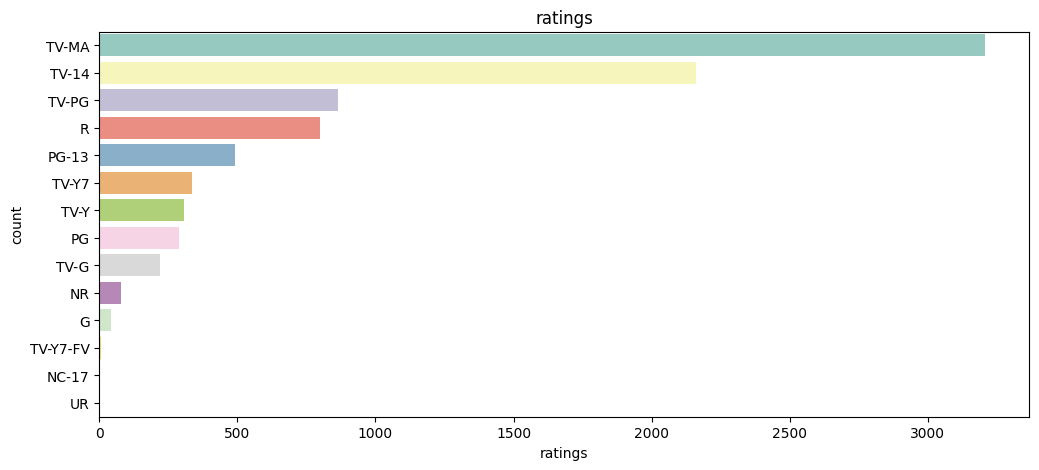

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,y='rating',order=df['rating'].value_counts().index,palette="Set3")
plt.title('ratings')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

 * The countplot of ratings shows that TV-MA has the highest frequency, dominating the dataset.

* This indicates that the majority of Netflix content is skewed toward mature/adult audiences.

/tmp/ipython-input-2689468634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month_added', order=[


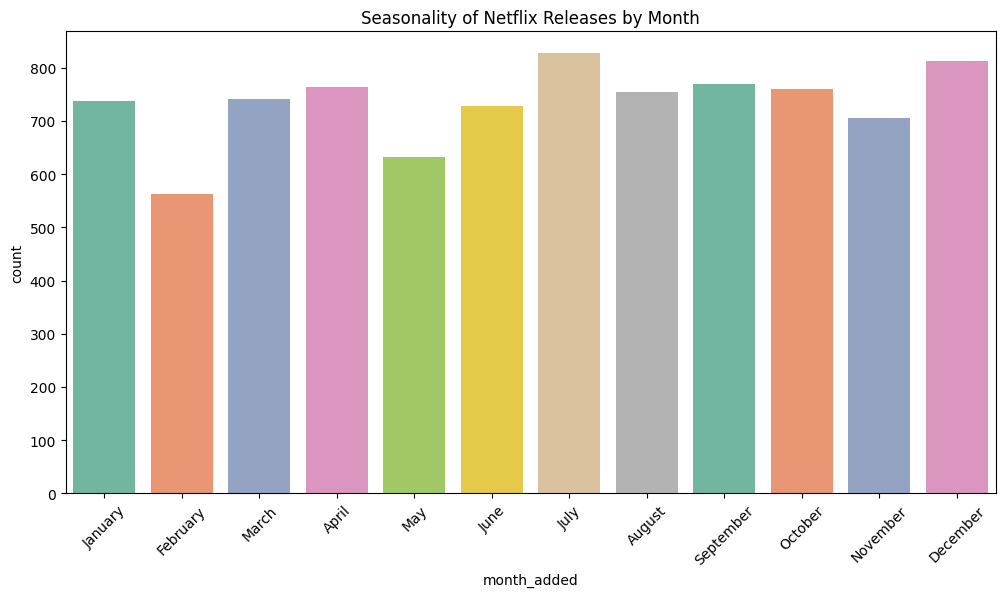

In [ ]:
# Convert to string and strip spaces
df['date_added'] = df['date_added'].astype(str).str.strip()

# Convert to datetime safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month names
df['month_added'] = df['date_added'].dt.month_name()

# Seasonal plot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month_added', order=[
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
], palette="Set2")
plt.title("Seasonality of Netflix Releases by Month")
plt.xticks(rotation=45)
plt.show()


peaks in new content around December, January, and July.
*  Netflix adds most content in holiday months (late Dec/Jan) and mid-year, aligning with when viewers have more free time.

In [ ]:
abc=df['month_added'].value_counts()

In [ ]:
abc

,count
month_added,
July,827
December,813
September,770
April,764
October,760
August,755
March,742
January,738
June,728


/tmp/ipython-input-3824500015.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=shows['duration'], order=shows['duration'].value_counts().index,


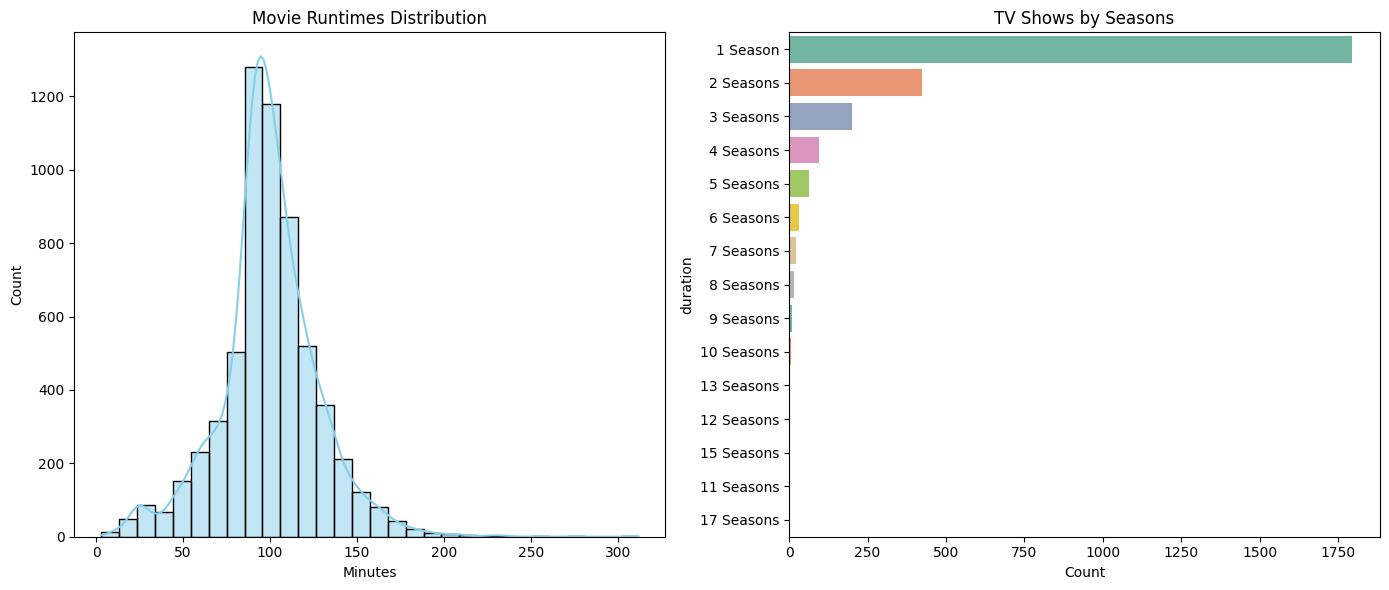

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Movies duration (minutes)
sns.histplot(movies['duration'].str.replace(' min', '').astype(float),
             bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Movie Runtimes Distribution")
axes[0].set_xlabel("Minutes")

# TV Shows duration (seasons)
sns.countplot(y=shows['duration'], order=shows['duration'].value_counts().index,
              ax=axes[1], palette="Set2")
axes[1].set_title("TV Shows by Seasons")
axes[1].set_xlabel("Count")

plt.tight_layout()
plt.show()



* Movie runtimes follow a near-normal distribution, with most clustering between 80–120 minutes, indicating Netflix prefers standard-length films.



* 1-season TV shows dominate overwhelmingly, with nearly 1,800+ titles, showing Netflix’s focus on limited or mini-series.


##  Bivariate Analysis
- **Boxplots:** Useful to compare categories (e.g., Movie vs TV Show duration).
- **Countplots with hue:** Show how two categorical variables relate (e.g., rating distribution across type).

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2038271409.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['cleaned']=df_clean['duration'].str.extract('(\d+)').astype(float)


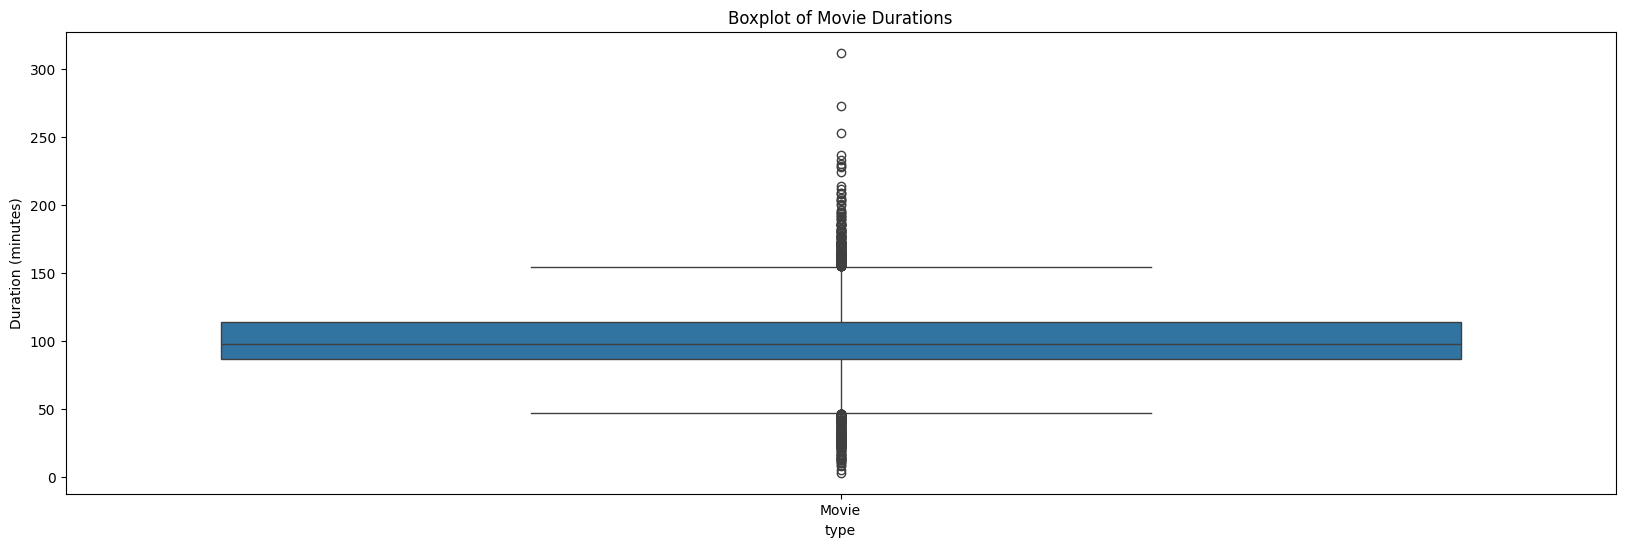

In [ ]:
df_clean=df.copy()

df['cleaned']=df_clean['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(20,6))
sns.boxplot(data=df_clean[df_clean['type']=='Movie'],x='type',y='cleaned')
plt.title("Boxplot of Movie Durations")
plt.ylabel("Duration (minutes)")
plt.show()

Shows the distribution of movie durations, with most falling around 90–120 minutes, but with many outliers both shorter and longer.

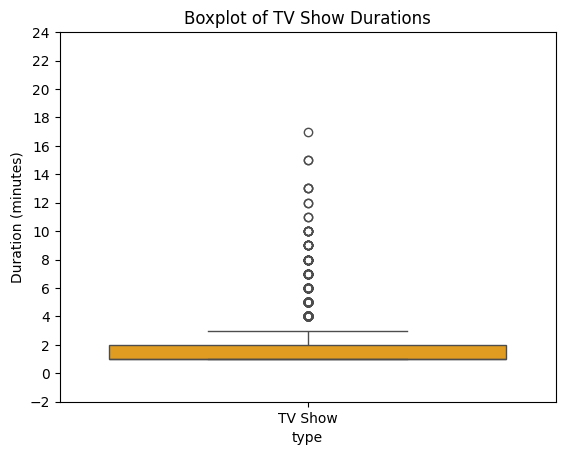

In [ ]:
sns.boxplot(data=df_clean[df_clean['type']=='TV Show'],x='type',y='cleaned',color='orange')
plt.title("Boxplot of TV Show Durations")
plt.ylabel("Duration (minutes)")
plt.yticks(range(-2,25,2))
plt.show()


TV show durations, mostly clustered at 1–2 seasons, with some extending beyond 10 seasons (outliers).

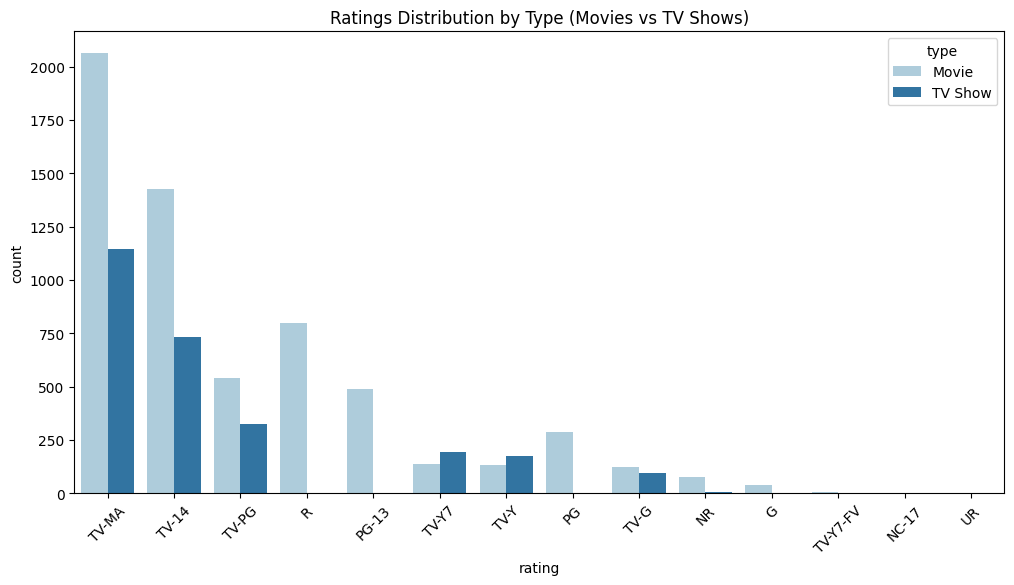

In [ ]:
# b. Countplot with hue: Ratings by Type
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette="Paired")
plt.title("Ratings Distribution by Type (Movies vs TV Shows)")
plt.xticks(rotation=45)
plt.show()

Compares movie vs. TV show ratings distribution, showing TV-MA and TV-14 dominate both categories.

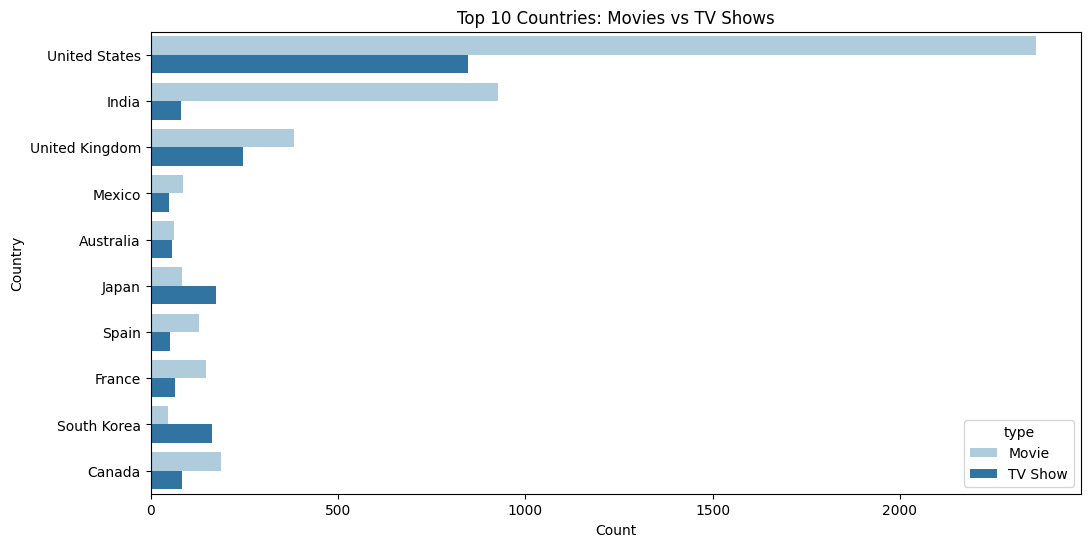

,count
main_country,
United States,3211
India,1008
United Kingdom,628


In [ ]:
# Pre-process country column (take first country if multiple are listed)
df['main_country'] = df['country'].dropna().apply(lambda x: x.split(",")[0])

# Top 10 countries
top_countries = df['main_country'].value_counts().head(10).index
df_top_countries = df[df['main_country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_countries, y='main_country', hue='type', palette="Paired")
plt.title("Top 10 Countries: Movies vs TV Shows")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()
df['main_country'].value_counts().head(3)



Compares the number of movies and TV shows by country. The U.S. dominates, followed by India and the U.K.

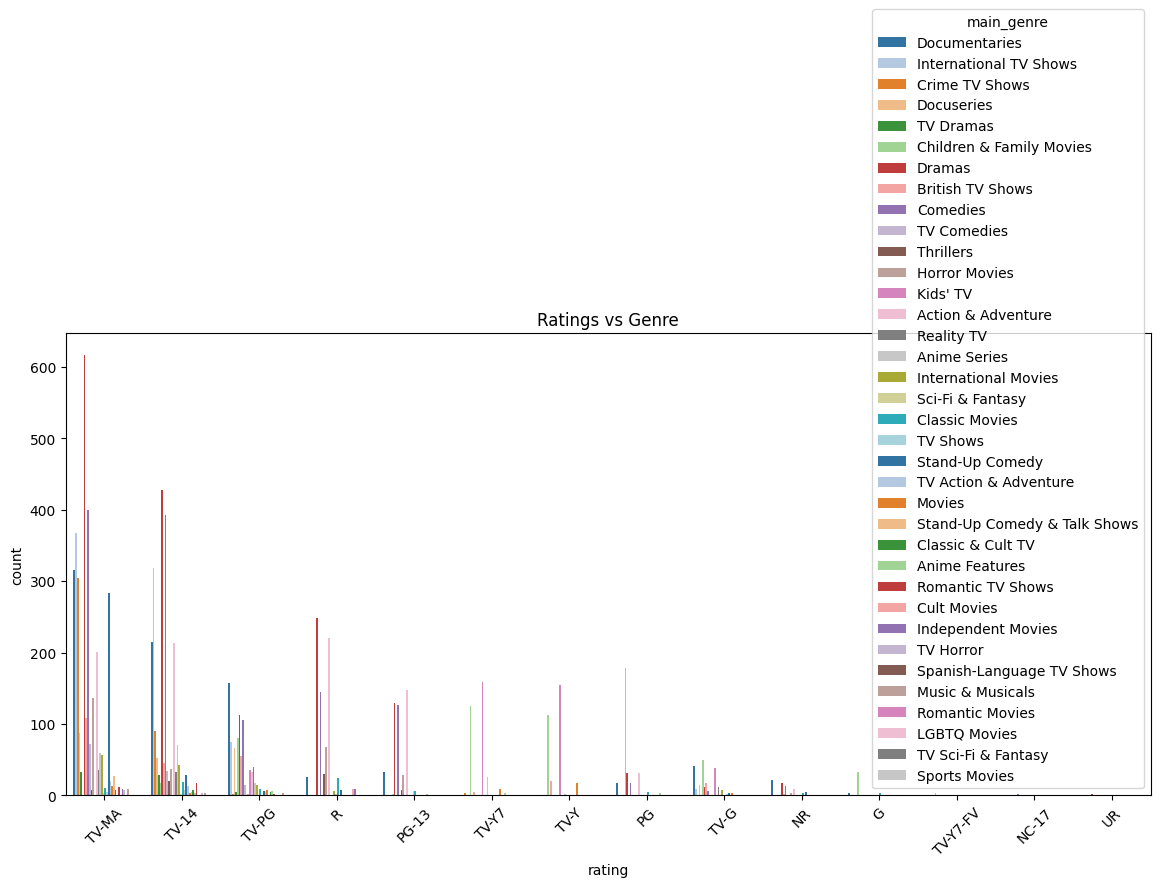

In [ ]:
# Pre-process listed_in (genre) by taking first genre
df['main_genre'] = df['genre'].dropna().apply(lambda x: x.split(",")[0])

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='rating', hue='main_genre', order=df['rating'].value_counts().index, palette="tab20")
plt.title("Ratings vs Genre")
plt.xticks(rotation=45)
plt.show()

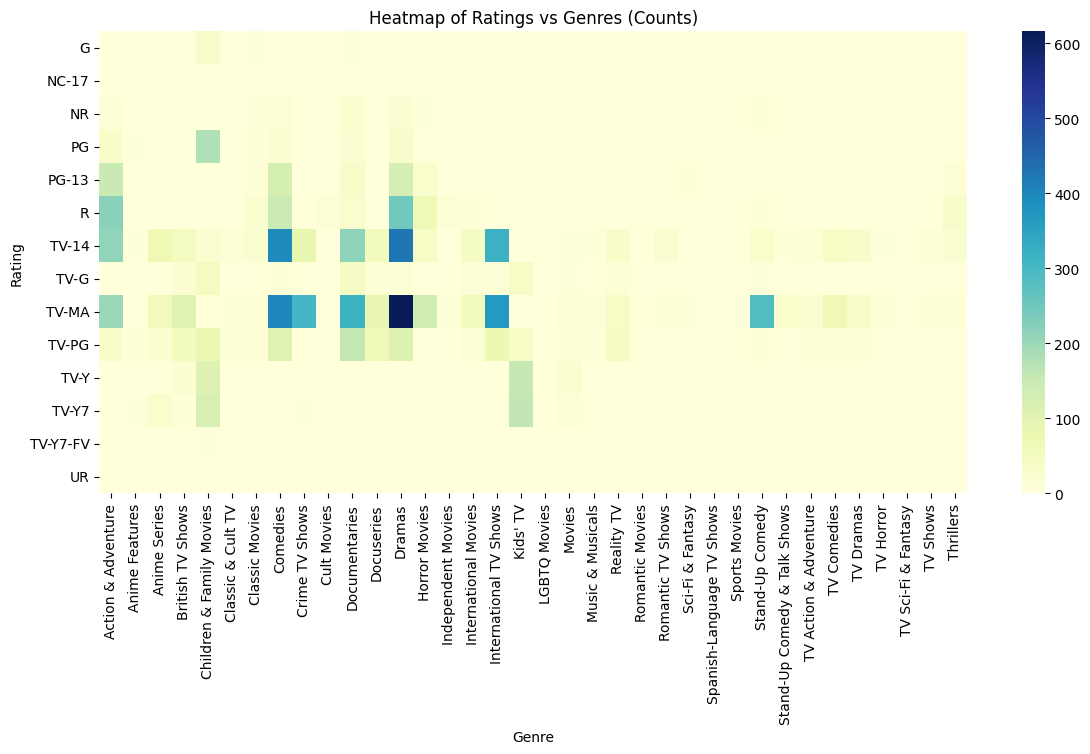

In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(rating_genre, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Heatmap of Ratings vs Genres (Counts)")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

Shows how genres are distributed across different ratings. High counts appear in Dramas, Comedies, and International Movies

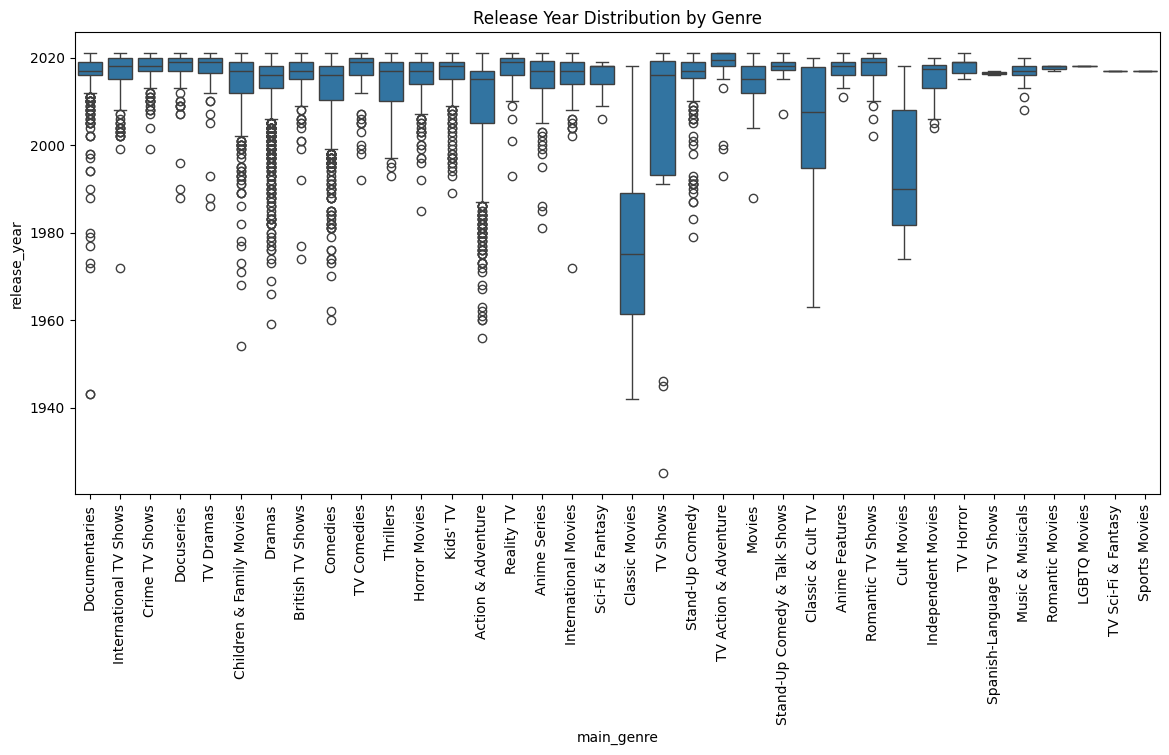

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='main_genre', y='release_year')
plt.title("Release Year Distribution by Genre")
plt.xticks(rotation=90)
plt.show()

Shows the spread of release years across genres. Most genres are concentrated around the 2010–2020 era, with older classics appearing as outliers.

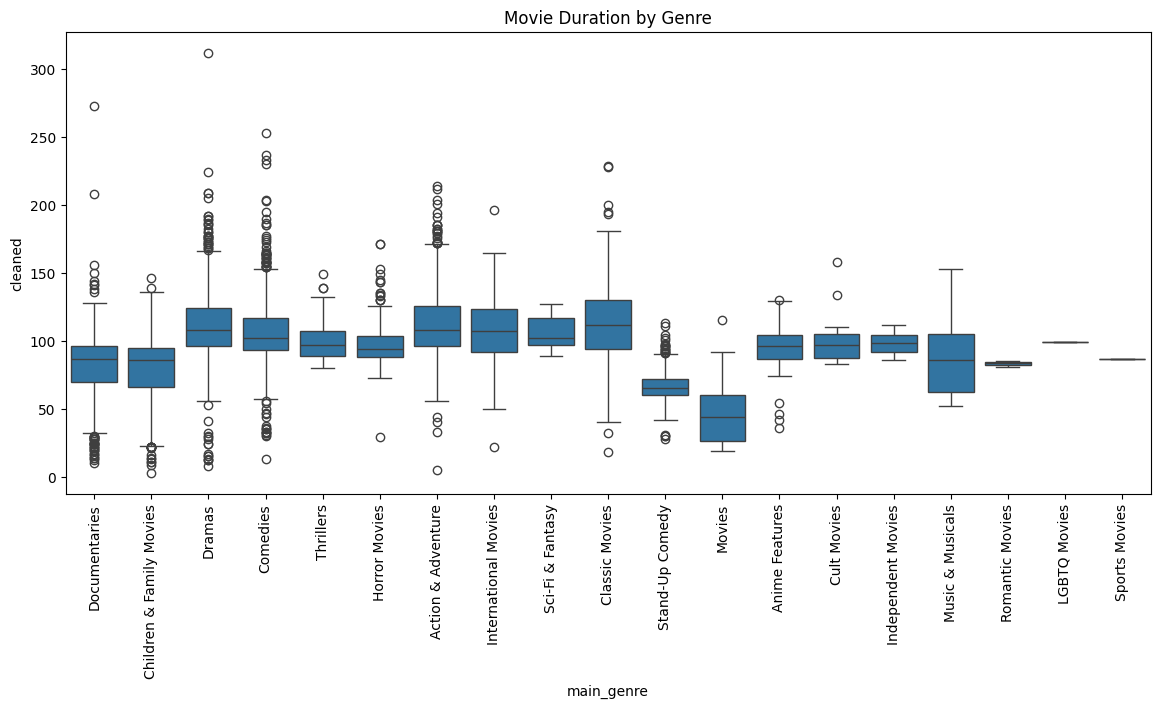

In [ ]:
# Boxplot of Duration by Genre (Movies only)
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['type']=="Movie"], x='main_genre', y='cleaned')
plt.title("Movie Duration by Genre")
plt.xticks(rotation=90)
plt.show()

Displays movie durations categorized by genres. Documentaries and Dramas show wide variation, while Children & Family movies are shorter.

#Missing Value & Outlier Check

In this step, we focus on two key data quality aspects:

(a) Missing Values — checking which attributes contain null or blank entries. Missing values can distort analysis if not handled properly.

(b) Outliers — unusual or extreme values, especially in numerical fields like duration (minutes) or release_year. Outliers might represent data entry errors or exceptional cases.


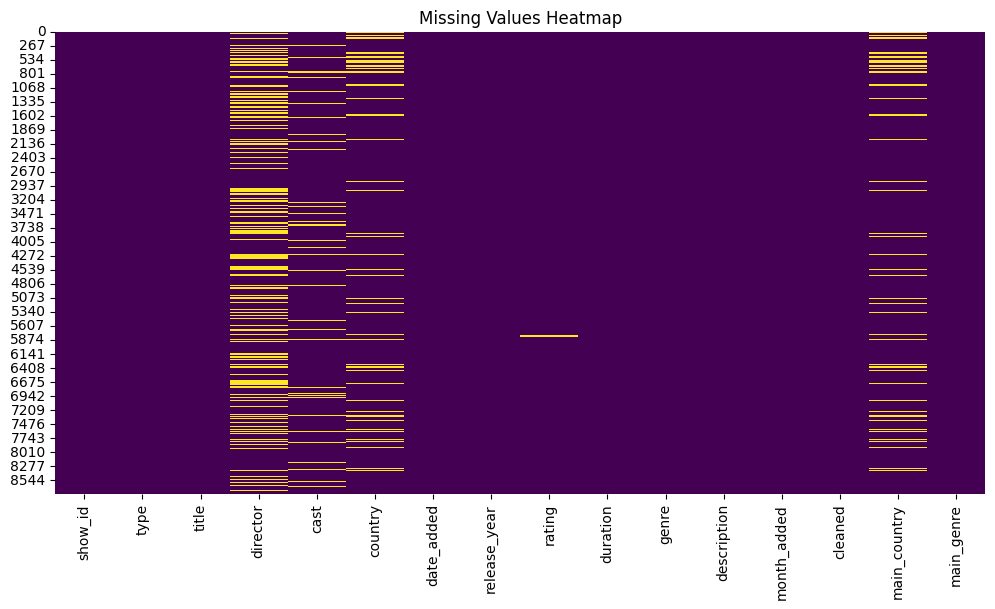

In [ ]:
#checking null values using Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),cbar=False,cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Count of missing values per column
missing_counts = df.isnull().sum()
print("Missing Value Counts:\n", missing_counts)

# Percentage of missing values
missing_percent =(df.isnull().sum()/len(df))*100
print("\nMissing Value Percentages:\n", missing_percent)

Missing Value Counts:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
genre              0
description        0
month_added       10
cleaned            0
main_country     831
main_genre         0
dtype: int64

Missing Value Percentages:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.079482
duration         0.000000
genre            0.000000
description      0.000000
month_added      0.113546
cleaned          0.000000
main_country     9.435676
main_genre       0.000000
dtype: float64


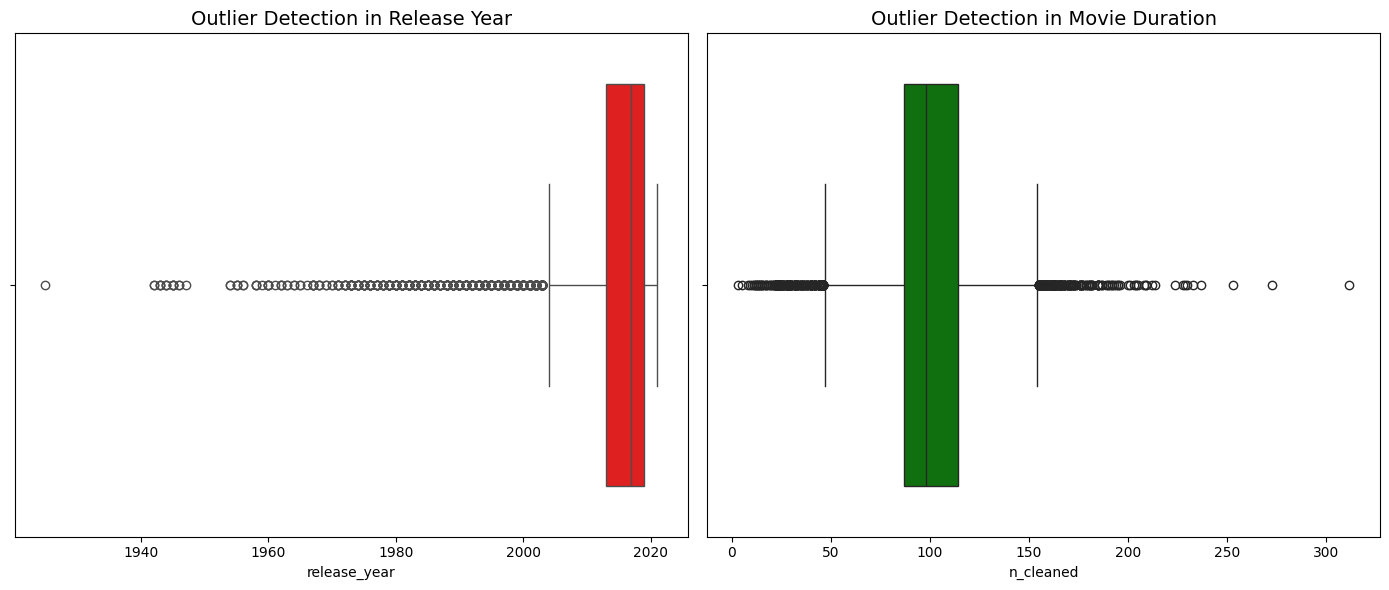

In [ ]:
n_movies=df[df['type']=='Movie'].copy()
df['n_cleaned']=n_movies['duration'].dropna().str.replace('min','').astype(int)


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Release Year
sns.boxplot(x=df['release_year'], ax=axes[0],color='red')
axes[0].set_title("Outlier Detection in Release Year", fontsize=14)

# Boxplot for Movie Duration
sns.boxplot(x=df['n_cleaned'], ax=axes[1],color='green')
axes[1].set_title("Outlier Detection in Movie Duration", fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
print('unsusual release years are:',df['release_year'].sort_values().unique()[:10],'\n\n\nusual relese years are:',df['release_year'].sort_values().unique()[-7:])

unsusual release years are: [1925 1942 1943 1944 1945 1946 1947 1954 1955 1956] 


usual relese years are: [2015 2016 2017 2018 2019 2020 2021]


In [ ]:
print("Unusual Durations are:", df['n_cleaned'].sort_values().unique()[:10],
      "......", df['n_cleaned'].sort_values().unique()[-10:-1])

Unusual Durations are: [ 3.  5.  8.  9. 10. 11. 12. 13. 14. 15.] ...... [224. 228. 229. 230. 233. 237. 253. 273. 312.]


# Insights based on Non-Graphical and Visual Analysis




##Comments on the Range of Attributes




Here, we discuss the spread of each column/attribute:

**Release Year**


*   Range: From 1925 to 2021 (nearly a century).
*   Observation: Very few titles before 1980 → old classics are rare. Huge spike post-2000, especially after 2010.

*   *`Insight`*: The catalog is heavily biased toward modern content, which matches Netflix’s strategy of offering “new and relevant” titles to attract binge-watchers.

Date Added
*  Range: Data mostly between 2015–2021.
*  Observation: Consistent growth every year, with noticeable peaks in December, January, and July.

* *`Insight`*: Netflix seems to time its releases around holidays and summer breaks when audiences have more free time.

**Duration**
* Movies: Range from 4 minutes to ~250 minutes. Most cluster between 60–120 minutes.

* TV Shows: Range from 1 to 16 seasons. Most are mini-series (1–2 seasons).

* *`Insight`*: Netflix sticks to standard formats, but also experiments with very short/very long content to serve niche audiences.

**Ratings**
* Range: From “TV-Y” (kids’ shows) to “TV-MA/R” (mature content).

* *`Insight`*: Covers a broad audience spectrum (children, teens, families, adults). But TV-MA dominates → indicating Netflix’s focus on mature, edgy content.

**Countries**
* Range: 100+ countries listed. But distribution is highly skewed.

* USA dominates → followed by India, UK, and Canada. Many titles have multiple countries.

* *`Insight`*: While marketed as “global,” the catalog is heavily skewed toward USA and a few key markets.

**Genres (Unnested)**

* Range: 20+ genres once split by commas.

* *`Insight`*: Drama, Comedy, International Movies dominate. Genres like Stand-up Comedy and Documentaries have grown only in recent years.



##Comments on the Distribution of Variables & Relationships

Now we interpret how each attribute is spread (distribution) and connected (relationships):

**Release Year Distribution**
* Heavily skewed toward recent decades. ~80% content is after 2000.

* *`Insight`*: Netflix focuses on “fresh” content, rarely adding old classics unless they are cult hits.


**Duration Distribution**

* Movies → Bell-shaped around 90–120 mins.

* Outliers: Very short films (stand-up specials, shorts) and very long ones (Bollywood movies, documentaries).

* TV Shows → Mostly 1–3 seasons, only a few very long-running shows.

* *`Insight`*: Netflix balances snackable content (short formats) with binge-worthy long series.

**Ratings Distribution**

* Most frequent: TV-MA → Adult/mature content.

* Kids’ content exists but is a smaller portion.

* *`Insight`*: Netflix is positioned more as a teen/adult platform rather than family-friendly like Disney+.

**Movies vs. TV Shows**

* Movies ≈ 70%, TV Shows ≈ 30%.

* *`Insight`*: Movies dominate, but Netflix Originals are increasingly TV series → shows like Stranger Things or Money Heist pull subscribers in.

**Country Distribution**

* Heavily skewed to the USA.

* India, UK, Canada also major contributors.

* Many multi-country productions (US + international).

* *`Insight`*: Netflix is global, but the content pipeline is still concentrated in specific regions.

**Date Added Distribution (Seasonality)**

* Peaks in Dec, Jan, July.

* *`Insight`*: Matches consumer free time → holiday binge culture.

**Relationships**

* Rating vs. Genre: Kids’ genres = G/PG/TV-Y. Horror/thriller = TV-MA/R. Clear target-audience separation.

* Release Year vs. Genre: Genres like International Films and Stand-up Comedy mainly appear post-2015.

* Duration vs. Genre: Documentaries vary widely in length, while Drama/Comedy stick to typical runtime.


#insights based on Visualizations

1. **Boxplot of Movie Durations**


* *`Insight`*: The majority of movies follow the standard length (90–120 minutes), but Netflix also offers extreme short films and very long-duration content, indicating diversity in their movie catalog.

2. **Boxplot of TV Show Durations**



* Insight *`italicized text`*: Most TV shows on Netflix are short in terms of seasons, suggesting that Netflix tends to invest more in limited or shorter series formats.

3. ** Ratings Distribution by Type (Movies vs TV Shows)**


* *`Insight`*: Netflix strongly caters to mature audiences, as adult-oriented content (TV-MA, TV-14, R) makes up the majority, highlighting its strategy to target older demographics.

4. Top 10 Countries: Movies vs TV Shows



Valuable Insight: Netflix heavily relies on U.S. content, but India’s strong representation (especially in movies) indicates Netflix’s strategic push into Asian markets.

5. **Heatmap of Ratings vs Genres**


Valuable Insight: Content like Dramas and International Movies receive the most diverse ratings, suggesting Netflix produces/hosts these genres for all audiences (from kids to adults).

6. **Release Year Distribution by Genre**



* Insight *`italicized text`*: Netflix content is mostly modern, but by including older films/TV shows (e.g., classics, cult movies), it diversifies its library to appeal to nostalgia-driven audiences.

7. Movie Duration by Genre


* *`Insight`*: Genre strongly influences duration – family/kids movies are shorter to fit attention spans, while Documentaries/Dramas are longer for in-depth storytelling.

#Business Insights


After conducting both non-graphical and visual analysis, These insights reveal patterns in content type, distribution, time-based trends, and audience-focused strategies.

1. Content Mix

Movies dominate the catalog (~70%), while TV Shows account for ~30%.

Insight: Netflix has traditionally focused on movies, but the rise of TV Shows suggests growing demand for long-form, binge-worthy content.

Business impact: Netflix should continue balancing between movie releases (to capture casual viewers) and series (to retain long-term engagement).

2. Temporal Trends

Peaks in content addition are observed in December, January, and mid-year (July).

Insight: This aligns with holidays and vacation periods when people consume more entertainment.

Business impact: Reinforces the idea of syncing new content releases with holiday seasons to maximize viewership and subscriptions.

3. Geographical Insights

A few countries (like the US, India, and UK) dominate content production.

Insight: Despite Netflix being global, its content sources are concentrated.

Business impact: Netflix could expand its localization strategy (producing more regional content) to increase market penetration and attract diverse audiences.

4. Ratings and Audience Targeting

Ratings show concentration around TV-MA, TV-14, and PG-13.

Insight: Netflix primarily targets teen and adult audiences, with less emphasis on kids’ content.

Business impact: While this caters to mainstream audiences, expanding safe, family-friendly content could help attract households with children.

5. Genre Insights

Popular genres: Dramas, Comedies, International Movies.

Insight: Viewers prefer storytelling-heavy genres and content that resonates across cultures.

Business impact: Investing more in universally relatable genres (like dramas and thrillers) will likely boost global engagement.

6. Duration and Format

Most movies cluster around 90–120 minutes; TV shows around 1–3 seasons.

Insight: Standardized formats dominate, but shorter content (mini-series, limited runs) is increasingly popular.

Business impact: Offering short-form or experimental formats may appeal to mobile-first users and younger audiences.

7. Outliers & Data Quality Observations

A few anomalies in release years (very old or future-dated entries).

Insight: These may represent errors or re-releases.

Business impact: Maintaining high-quality metadata is crucial for better recommendations and user trust.


**Summary:**
*Overall, Netflix’s catalog emphasizes global dramas and movies, with seasonal spikes in new content. The focus is on young adult audiences, but there’s room to grow by producing more family-oriented, regional, and experimental formats.*



# Recommendations

Based on the analysis, here are some simple steps Netflix can take:

1. Keep a good mix of movies and TV shows.
Movies bring quick entertainment, while TV shows keep people engaged for longer.

2. Release content at the right time.
Add more shows and movies during December, January, and July, when people are on holidays and watch more.

3. Focus on local content.
Make and buy more shows in different languages (like Indian, Korean, Spanish). This will bring in more people from around the world.

4. Target all age groups.
Add more family and kids’ shows along with teen and adult content, so everyone in a household finds something to watch.

5. Invest in popular genres.
Keep making dramas, comedies, and thrillers because people love them. At the same time, try new things like docuseries or short shows to attract new viewers.

6. Plan content length wisely.
Movies of around 90–120 minutes and TV shows with 1–3 seasons work best. Try short specials for mobile viewers too.

7. Clean up data issues.
Fix errors in content details (like wrong years). This will help improve search and recommendations for users.